In [0]:
"""bi b l i o t e c a numerica """
import numpy as np

""" g r a f i c a s """
import matplotlib.pyplot as plt
%matplotlib inline

""" c a r g a r d a t a s e t s """
from sklearn import datasets

""" para n o rm ali z a r """
from sklearn.preprocessing import MinMaxScaler , StandardScaler, OneHotEncoder

from sklearn.metrics import confusion_matrix


In [0]:
np.random.seed(100)

In [0]:
X = datasets.load_iris().data[:150]
Y = datasets.load_iris().target[:150]

In [0]:
def sigmoide(x):
  return 1/(1+np.exp(-x))

In [0]:
def evalua(x,W0,W1,W2):
  Y0 = sigmoide(x.dot(W0))
  Y1 = sigmoide(Y0.dot(W1))
  Y2 = sigmoide(Y1.dot(W2))
  return Y0,Y1,Y2

In [0]:
def derSigmoide(y):
  return y*(1-y)

In [0]:
def entrenamiento(Xj,Yj,W0,W1,W2):
  """Xj es un arreglo con 1 o mas casos """
  YY0, YY1, YYout = evalua(Xj, W0,W1,W2)
  errorOut = Yj - YYout
  """ d" en la capa de salida """
  dW2 = errorOut * derSigmoide(YYout)
  error1 = dW2.dot(W2.T)
  """ dW en la 2a capa oculta"""
  dW1 = error1 * derSigmoide(YY1)
  error0 = dW1.dot(W1.T)
  dW0 = error0 * derSigmoide(YY0)

  """ Calculando los ajustes """
  incW0 = Xj.T.dot(dW0)
  incW1 = YY0.T.dot(dW1)
  incW2 = YY1.T.dot(dW2)
  
  return incW0,incW1,incW2

In [0]:
alea=np.random.permutation(150)
print(alea)

[128  11 118  15 123 135  32   1 116  45  40 115  26  28 145  97  62  77
 122 112 125  31 146  29  69 149  75  20  73 120  81  99 119  12  16  51
  46  89 136 114  41  90 102 109  37   6  25  21  92   9  23  35  54 131
 127  84 111  96 117 110  82  22 139 124 133  33  42 101   5  36  43  52
 104 144 134  10  85  70   3  76  57 126   0  78  88  83  50  68  95 132
 113  13  72  17  74 129 137 106  64  18  44  38  39 121  48  30  56  27
 140  63 141  19 142 105   2  80  71  55 143  61  65  47  49   7 147  59
  91   4 100 108 130  86  93  58  60 107 148  34  14  66  53  98  94 138
  79  87 103  67  24   8]


In [0]:
indx=np.zeros(150,dtype=int)
for i in range(0,150):
  indx[alea[i]]=i

Yindx=np.zeros(150,dtype=int)
Xindx=np.zeros(4*150).reshape((150,4))
for i in range(0,150):
  Yindx[i]=datasets.load_iris().target[indx[i]]
  Xindx[i]=datasets.load_iris().data[indx[i]]

print(Xindx[:150:10],Yindx[:150:10])

[[5.8 2.7 3.9 1.2]
 [6.6 3.  4.4 1.4]
 [5.2 3.5 1.5 0.2]
 [7.6 3.  6.6 2.1]
 [5.4 3.7 1.5 0.2]
 [6.7 3.1 4.7 1.5]
 [6.1 2.6 5.6 1.4]
 [6.7 3.  5.  1.7]
 [6.4 3.2 5.3 2.3]
 [4.5 2.3 1.3 0.3]
 [6.4 2.8 5.6 2.1]
 [5.2 2.7 3.9 1.4]
 [4.7 3.2 1.6 0.2]
 [7.4 2.8 6.1 1.9]
 [6.7 2.5 5.8 1.8]] [1 1 0 2 0 1 2 1 2 0 2 1 0 2 2]


Inciso a)

In [0]:
def oneHot(Yindx):
  sal=np.zeros((150,3))
  for i in range(0,150):
    sal[i][Yindx[i]]=1
  return sal


Yindx = oneHot(Yindx)
print(Yindx)

Inciso C)

In [0]:
def clase(X):
  resp=np.zeros((150,3))
  R=np.argmax(X, axis=1)
  for i in range(0,150):
    resp[i][R[i]]=1
  return resp

Inciso D)

In [0]:
def matrizcon(Yv,Yp):
  resp=np.zeros((3,3))
  X=np.argmax(Yv, axis=1)
  Y=np.argmax(Yp, axis=1)
  for i in range(0,150):
    if(Y[i]==X[i]):
      resp[X[i]][Y[i]]=resp[X[i]][Y[i]]+1
    else:
      resp[X[i]][Y[i]]=resp[X[i]][Y[i]]+1
      resp[Y[i]][X[i]]=resp[Y[i]][X[i]]+1
  return resp

Inciso B)

In [0]:
np.random.seed(np.random.randint(0,1000))
N=800
resp=[]
W0=np.random.random((4,3))-0.5
W1=np.random.random((3,2))-0.5
W2 = np.random.random((2,3))-0.5
for i in range(0,N):
  rand=np.random.randint(0,100)
  incW0, incW1, incW2 = entrenamiento(Xindx[rand].reshape( (1, 4)),Yindx[rand],W0,W1,W2)
  W0=incW0+W0
  W1=incW1+W1
  W2=incW2+W2
  YY0, YY1, RespTodos = evalua(Xindx,W0,W1,W2)
  YR=clase(RespTodos)
  mat=matrizcon(Yindx, YR)
  print("Matriz de confusion Epoca ",i+1," :\n",mat,"\n\n")
  X=np.argmax(Yindx, axis=1)
  print(Yindx.shape)
  Y=np.argmax(YR, axis=1)
  print("X", X)
  print("y", Y)
  resp.append(np.sum((X==Y)*1)/150.0)

print("Vector de Exactitud: \n",resp)

Streaming output truncated to the last 5000 lines.
 [[50. 50. 50.]
 [50.  0.  0.]
 [50.  0.  0.]] 


(150, 3)
X [1 0 2 1 2 1 0 2 2 0 1 0 0 1 2 0 0 1 1 2 0 0 1 1 2 0 0 2 0 0 2 0 0 1 2 1 1
 0 2 2 0 0 1 1 2 0 0 2 2 2 1 0 1 2 1 2 2 1 2 2 2 2 0 2 1 2 2 2 1 0 1 2 1 0
 1 0 1 0 1 2 2 0 1 1 1 1 2 2 1 0 0 2 0 2 2 1 1 0 2 0 2 1 0 2 1 2 1 2 2 0 1
 1 0 1 0 0 0 1 0 0 0 2 0 0 1 0 1 1 0 1 2 1 1 1 1 0 0 1 2 1 2 2 2 2 1 0 0 2
 2 0]
y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Matriz de confusion Epoca  508  :
 [[50. 50. 50.]
 [50.  0.  0.]
 [50.  0.  0.]] 


(150, 3)
X [1 0 2 1 2 1 0 2 2 0 1 0 0 1 2 0 0 1 1 2 0 0 1 1 2 0 0 2 0 0 2 0 0 1 2 1 1
 0 2 2 0 0 1 1 2 0 0 2 2 2 1 0 1 2 1 2 2 1 2 2 2 2 0 2 1 2 2 2 1 0 1 2 1 0
 1 0 1 0 1 2 2 0 1 1 1 1 2 2 

Inciso E)

Exactitud Maxima:  0.9666666666666667 En la epoca:  584


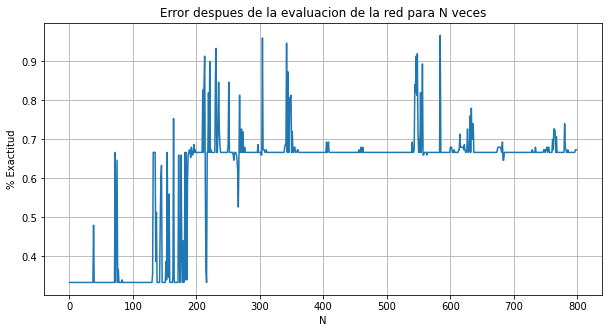

In [0]:
print("Exactitud Maxima: ", max(resp),"En la epoca: ", resp.index(max(resp)))

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(np.arange(N), resp)
plt.title("Error despues de la evaluacion de la red para N veces")
plt.xlabel("N")
plt.ylabel("% Exactitud")
plt.grid()